In [14]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../pyplr/'))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import stlab

sns.set_context("notebook", font_scale=1.2)
sns.set_style("ticks")
colors = stlab.get_led_colors()
datadir = '/Users/jtm/Documents/cvd_pupillometry/data/spectrometer/'
%matplotlib inline

Text(0.5, 0, 'Wavelength (nm)')

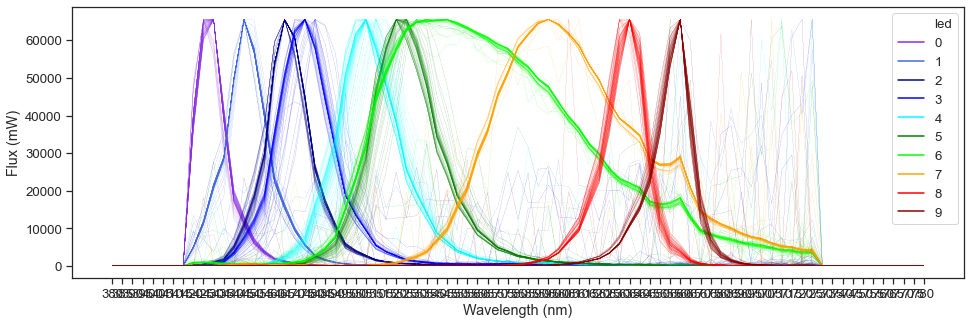

In [21]:
stlab_spectra = pd.read_csv(datadir + 'stlab_led_intensity_spectra_08-17-20-14-31.csv')
stlab_info = pd.read_csv(datadir + 'stlab_led_intensity_info_08-17-20-14-31.csv')
stlab_spectra = stlab_spectra.divide(stlab_info.rmv, axis='index')

# do some wrangling for an easy seaborn plot
stlab_spectra.index = pd.MultiIndex.from_frame(stlab_info[['led', 'intensity']])
stlab_spectra.sort_index(inplace=True)
stlab_spectra.reset_index(inplace=True)
long = stlab_spectra.melt(id_vars=['led','intensity'], var_name='wavelength', value_name='flux')
long.reset_index(inplace=True)
long= long.sort_values(by=['led','intensity'])
long.reset_index(inplace=True)

#long = long[long.intensity!=0]

# set up figure
fig, ax = plt.subplots(figsize=(16,5))

# plot SPDs
sns.lineplot(x='wavelength', y='flux', data=long, hue='led', palette=colors, units='intensity', ax=ax, lw=.1, estimator=None)
ax.set_ylabel("Flux (mW)")
ax.set_xlabel("Wavelength (nm)")


Text(0.5, 0, 'Wavelength (nm)')

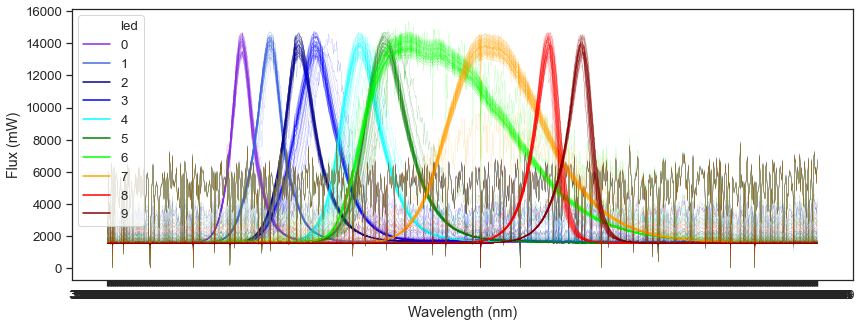

In [22]:
oo_spectra = pd.read_csv(datadir + 'oo_led_intensity_spectra_08-17-20-14-31.csv')
oo_info = pd.read_csv(datadir + 'oo_led_intensity_info_08-17-20-14-31.csv')

# do some wrangling for an easy seaborn plot
oo_spectra.index = pd.MultiIndex.from_frame(oo_info[['led','intensity']])
oo_spectra.sort_index(inplace=True)
oo_spectra.reset_index(inplace=True)
long = oo_spectra.melt(id_vars=['led','intensity'], var_name='wavelength', value_name='flux')
long.reset_index(inplace=True)
#long = long[long.intensity!=0]

# set up figure
fig, ax = plt.subplots(figsize=(14,5))

# plot SPDs
sns.lineplot(x='wavelength', y='flux', data=long, hue='led', palette=colors, units='intensity', ax=ax, lw=.1, estimator=None)
ax.set_ylabel("Flux (mW)")
ax.set_xlabel("Wavelength (nm)")
